In [1]:
import sys

sys.path.append("..")

from copy import deepcopy
from random import sample

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from xgboost import XGBClassifier

from src.baseline_functions import *
from src.dips_selector import *
from src.data_loader import *


In [2]:
def quadrants(p, n_unlabeled, n_labeled, n_test, shift, random_state=42):
    """
    Quadrants data set
    """
    np.random.seed(random_state)
    X = []
    n_total = n_unlabeled + n_labeled + n_test
    for i in range(n_total):
        #first sample x<0 or x>0
        x = np.random.uniform(-1, 1)
        if x < 0:
            if np.random.uniform(0, 1) < p:
                y = np.random.uniform(-1,0) +shift
            else:
                y = np.random.uniform(0,1) + shift
        elif x >0 : 
            if np.random.uniform(0, 1) < p:
                y = np.random.uniform(0,1)
            else:
                y = np.random.uniform(-1,0)
        X.append([x,y])
    X = np.array(X)

    print(X.shape)
    y = np.zeros(n_unlabeled + n_labeled + n_test)
    y[X[:, 0] > 0] = 1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n_test, random_state=random_state)
    X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X_train, y_train, test_size=n_unlabeled, random_state=random_state)
    return X_train, y_train, X_unlabeled, y_unlabeled, X_test, y_test

(2100, 2)


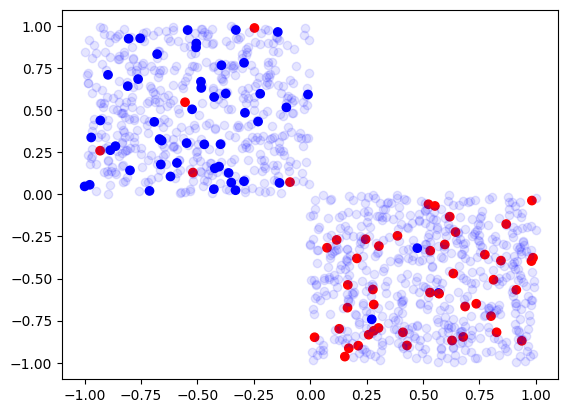

/var/folders/jd/hgy3cyq57_bg2vdnx_hhwq6c0000gn/T/ipykernel_91497/2245349483.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[class_1_mask, 0], X_train[class_1_mask, 1], c='red', s=3, label='Class 1', cmap = vibrant)
/var/folders/jd/hgy3cyq57_bg2vdnx_hhwq6c0000gn/T/ipykernel_91497/2245349483.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[class_2_mask, 0], X_train[class_2_mask, 1], c='blue', s=3, label='Class 2', cmap = vibrant)


<Figure size 300x300 with 0 Axes>

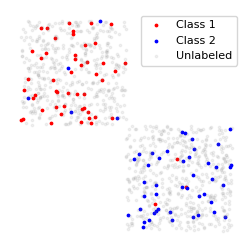

In [3]:
X_train, y_train, X_unlabeled, y_unlabeled, X_test, y_test = quadrants(0., 1000, 100, 1000, 0)

#Flip the label of 10% of the labeled data
y_train = deepcopy(y_train)
y_train[sample(range(len(y_train)), int(len(y_train)*0.1))] = 1 - y_train[sample(range(len(y_train)), int(len(y_train)*0.1))]

#Plot the data, the red points are the >labeled data, the blue points are the unlabeled data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='b', alpha=0.1)
plt.show()

#Plot of professional quality figure, for a research paper, without the axis labels, the axis ticks, and the legend
plt.figure(figsize=(3,3))
#make the figure lookvery nice
class_1_mask = y_train == 0
class_2_mask = y_train == 1

import matplotlib.colors as mcolors

# Create the plot
vibrant = mcolors.ListedColormap(['#FF3C38', '#3C5FFF'])

plt.figure(figsize=(3,3))
plt.scatter(X_train[class_1_mask, 0], X_train[class_1_mask, 1], c='red', s=3, label='Class 1', cmap = vibrant)
plt.scatter(X_train[class_2_mask, 0], X_train[class_2_mask, 1], c='blue', s=3, label='Class 2', cmap = vibrant)
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='grey', alpha=0.1, s=3, label='Unlabeled')

#add a legend for the colors: red is Class 1, blue is Class 0, grey is unlabeled
plt.legend(['Class 1', 'Class 2', 'Unlabeled'], loc='upper right', fontsize=8)
plt.axis('off')
# plt.savefig('quadrants.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

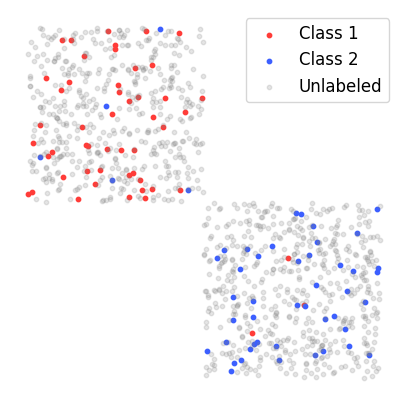

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create the boolean mask to separate the data points of class 1 and class 2
class_1_mask = y_train == 0
class_2_mask = y_train == 1

# Define the colormap and color cycle
vibrant = mcolors.ListedColormap(['#FF3C38', '#3C5FFF'])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=vibrant.colors)

# Create the plot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train[class_1_mask, 0], X_train[class_1_mask, 1], s=10, label='Class 1')
ax.scatter(X_train[class_2_mask, 0], X_train[class_2_mask, 1], s=10, label='Class 2')
ax.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], color='grey', alpha=0.2, s=10, label='Unlabeled')
ax.axis('off')

# Add the legend
ax.legend(frameon=True, fontsize=12)


# Save the plot
plt.show()

# Main code 

In [5]:
def plot(dips_xmetric, confidence, indicator_corrupted, dataset_name, easy_train, ambig_train, hard_train):
    plt.scatter(dips_xmetric[easy_train], confidence[easy_train], c="green", label="Easy")
    plt.scatter(dips_xmetric[ambig_train], confidence[ambig_train], c="orange", label="Ambiguous")
    plt.scatter(dips_xmetric[hard_train], confidence[hard_train], c="red", label="Hard")
    plt.legend()
    plt.xlabel("DIPS metric")
    plt.ylabel("Confidence")
    plt.title(f"DIPS metric vs confidence for {dataset_name}")
    plt.show()


    plt.scatter(dips_xmetric, confidence, c = indicator_corrupted, label="Labeled")
    plt.legend()
    plt.xlabel("DIPS metric")
    plt.ylabel("Confidence")
    plt.title(f"DIPS metric vs confidence for {dataset_name}")
    plt.show()

In [ ]:
dataset_name = "quadrants"
plotVerbose = False
prop_corruption_list = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
#prop_corruption_list = [0.4]
p = 0. #proportion of points on the left, which are in the lower quadrant
n_lab = 100
n_unlab = 900
shift = 0
n_trial = 50
pl_method = "pseudo"
seed=42 #10 avant
nest=100
n_test = 50000
prop_data=1 #prop for balancing purposes in the covid dataset
num_XGB_models=5
numIters=5 #Number of iterations for the pseudo-labeling algorithms
upper_threshold=0.8 #Threshold for the pseudo-labeling algorithms, i.e. confidence
verbose=False

#DIPS parameters
dips_ythresh = 0.2
dips_metric = "aleatoric"

#XGBoost parameters
param = {}
param["booster"] = "gbtree"
param["objective"] = "binary:logistic"
param["verbosity"] = 0
param["n_estimators"] = nest
param["silent"] = 1
param["seed"] = 42


from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

results_dict = {}

for method in ['fine', 'loss', 'filter']:


    #create a dataframe to store the results, where the columns are "prop_corruption", "trial", "accuracy", "method"
    df_results = pd.DataFrame(columns=["prop_corruption", "trial", "accuracy", "method"])
    list_artifacts  = []
    for prop_corruption in prop_corruption_list:

        for trial in range(n_trial):
            #Load data
            seed +=1
            param["seed"] +=1
            #proportion is the proportion of labeled data in the training dataset (thus excluding the test se

        
            x_train, y_train, x_unlabeled, y_unlabeled, x_test, y_test = quadrants(
                p, n_unlab, n_lab, n_test, shift, random_state=seed
            )


            #Corrupting the labels of the training set
            y_train = np.array(y_train)
            
            #Generate the indices of corruption
            indices = np.arange(len(y_train))
            np.random.seed(seed)
            np.random.shuffle(indices)
            num_corrupted = int(len(indices)*prop_corruption)
            corrupted_indices = indices[:num_corrupted]
            non_corrupted_indices = indices[num_corrupted:]
            indicator_corrupted = np.zeros(len(y_train))
            indicator_corrupted[corrupted_indices] = 1
            y_train[corrupted_indices] = 1 - y_train[corrupted_indices]

            
            ##############################################################
            ########## SUPERVISED ########################################
            ##############################################################
            
            
            print("Training Supervised model...")
            # create XGBoost instance with default hyper-parameters
            xgb_sup = XGBClassifier(**param)

            xgb_sup.fit(x_train, y_train)

            # evaluate the performance on the test set
            y_test_pred = xgb_sup.predict(x_test)
            supervised_learning_accuracy = np.round(
                accuracy_score(y_test_pred, y_test) * 100, 2
            )  # round to 2 digits xx.yy %

            #add a row to the datafram
            df_results = df_results.append({"prop_corruption": prop_corruption, "trial": trial, "accuracy": supervised_learning_accuracy, "method": "naive supervised"}, ignore_index=True)

            # Run DIPS
            dips_xgb = DIPS_selector(X=x_train, y=y_train)

            for i in range(1, nest):
                # *** Characterize with DIPS [LINE 2] ***
                dips_xgb.on_epoch_end(clf=xgb_sup, iteration=i)

            # *** Access metrics ***
            if dips_metric == "aleatoric":
                dips_xmetric = dips_xgb.aleatoric
            elif dips_metric == "epistemic":
                dips_xmetric = dips_xgb.variability
            elif dips_metric == "entropy":
                dips_xmetric = dips_xgb.entropy
            elif dips_metric == "mi":
                dips_xmetric = dips_xgb.mi

            confidence = dips_xgb.confidence

            threshold = 0.75*(np.max(dips_xmetric) - np.min(dips_xmetric))
            #Now plot the distribution of dips_xmetric
            
            dips_xthresh = threshold


            easy_train, ambig_train, hard_train = get_groups(
                confidence=confidence,
                aleatoric_uncertainty=dips_xmetric,
                dips_xthresh=dips_xthresh,
                dips_ythresh=dips_ythresh,
            )

            groups = [easy_train, ambig_train, hard_train]

            #Now we have the groups so we can do a scatter plot of the x metric vs the y metric, with the colors being the groups

            if plotVerbose:
                plot(dips_xthresh, confidence, indicator_corrupted, dataset_name, easy_train, ambig_train, hard_train)



            #Plot the data, the unlabeled data should begrey circles, while the labeled data should be colored stars, where the color is the label
            plt.scatter(x_train[:, 0], x_train[:, 1], marker = "*", c=y_train, label="Labeled")
            plt.scatter(x_unlabeled[:, 0], x_unlabeled[:, 1], marker = "o", c="grey", label="Unlabeled")
            plt.show()


            selected_points = easy_train
            if len(easy_train) == 0:  #in some settings, i.e. no corruption, the threshold might be ill defined. Hence, we just take all the points
                selected_points = np.arange(len(y_train))


            #2 using only the easy points and the ambiguous points
            selected_points = easy_train
            if len(easy_train) == 0:  #in some settings, i.e. no corruption, the threshold might be ill defined. Hence, we just take all the points
                selected_points = np.arange(len(y_train))
            
            
            if pl_method == "pseudo":
                (
                    acc_vanilla,
                    acc_dips_begin,
                    acc_dips_full,
                    acc_dips_partial,
                    artifacts,
                ) = run_pseudo(
                    x_unlabeled=x_unlabeled,
                    x_test=x_test,
                    y_test=y_test,
                    x_train=x_train,
                    y_train=y_train,
                    numIters=numIters,
                    #num_XGB_models=num_XGB_models,
                    upper_threshold=upper_threshold,
                    nest=nest,
                    seed=seed,
                    easy_train=selected_points,
                    dips_metric=dips_metric,
                    dips_xthresh=dips_xthresh,
                    dips_ythresh=dips_ythresh,
                    verbose=verbose,
                    method=method,
                    epochs=20,
                )
            

            elif pl_method == "ups":
                (
                    acc_vanilla,
                    acc_dips_begin,
                    acc_dips_full,
                    acc_dips_partial,
                    artifacts,
                ) = run_UPS(
                    x_unlabeled=x_unlabeled,
                    x_test=x_test,
                    y_test=y_test,
                    x_train=x_train,
                    y_train=y_train,
                    numIters=numIters,
                    num_XGB_models=num_XGB_models,
                    #upper_threshold=upper_threshold,
                    nest=nest,
                    seed=seed,
                    easy_train=selected_points,
                    dips_metric=dips_metric,
                    dips_xthresh=dips_xthresh,
                    dips_ythresh=dips_ythresh,
                    verbose=verbose,
                    weighting_rule = "hard",
                    discard_ambig_hard = True
                )
            
            else:
                raise ValueError("pl_method must be either 'pseudo' or 'ups'")


        
            #add the four results to the dataframe
            df_results = df_results.append({"prop_corruption": prop_corruption, "trial": trial, "accuracy": acc_vanilla, "method": "vanilla"}, ignore_index=True)
            df_results = df_results.append({"prop_corruption": prop_corruption, "trial": trial, "accuracy": acc_dips_begin, "method": "dips_begin"}, ignore_index=True)
            df_results = df_results.append({"prop_corruption": prop_corruption, "trial": trial, "accuracy": acc_dips_full, "method": "dips_full"}, ignore_index=True)
            df_results = df_results.append({"prop_corruption": prop_corruption, "trial": trial, "accuracy": acc_dips_partial, "method": "dips_partial"}, ignore_index=True)
            artifacts["easy_sup"]  = {}
            artifacts["sup"]  = {}
            artifacts["indicator_corrupted"] = [indicator_corrupted[selected_points[i]] for i in range(len(selected_points))] 
  
        #add the artifacts to the list
        list_artifacts.append(artifacts)
        from copy import deepcopy
        results_dict[method] = deepcopy(df_results)


In [8]:
import pickle
results_dict['DIPS'] = pd.read_pickle("../artifacts/synthetic_results.pkl")
with open('../artifacts/lnl_synthetic_results.pkl', 'wb') as file:
    pickle.dump(results_dict, file)

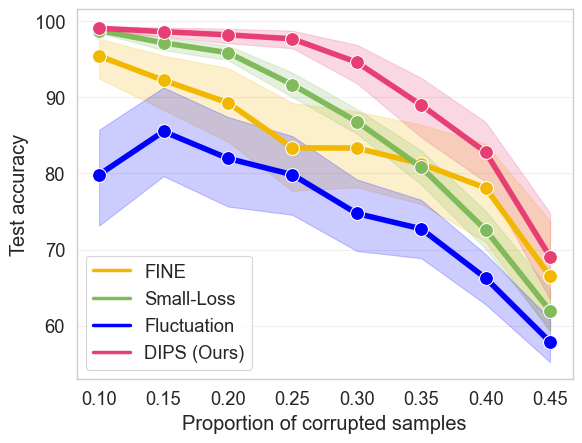

In [10]:
plt.figure()

method_names = []
for i, method in enumerate(results_dict.keys()):
    df_results = results_dict[method]

    iteration_snapshot = -1
    #For all rows in the dataframe, if the element in the accuracy column is a list, pick the first element
    #copy the dataframe first
    df_results2 = df_results.copy()
    #remove the rows where the method is "dips_begin" or "dips_partial"
    df_results2 = df_results2[~df_results2['method'].str.contains('dips_begin')]
    df_results2 = df_results2[~df_results2['method'].str.contains('dips_partial')]
    df_results2 = df_results2[~df_results2['method'].str.contains('vanilla')]
    df_results2 = df_results2[~df_results2['method'].str.contains('naive_supervised')]

    #remove the rows where prop_corruption is 0.5
    df_results2 = df_results2[df_results2["prop_corruption"] != 0.5]


    df_results2["accuracy"] = df_results2["accuracy"].apply(lambda x: x[iteration_snapshot] if type(x) == list else x)


    #Plot the results in the dataframe, with the x axis being the prop_corruption and the y axis being the accuracy
    sns.set_style("whitegrid")
    custom_colors  = ["#F2B701", "#80BA5A", "#E73F74", ]
    sns.set_context("paper", font_scale=1.5)
    #set the color palette to somethin distinguishable
    custom_palette = sns.color_palette("Set1", n_colors=8)
    #custom_palette = sns.color_palette([sns.desaturate(color, 0.9) for color in custom_palette])
    custom_colors = [sns.saturate(color) for color in custom_colors]
    custom_colors[1] = "#80BA5A"
    # Set the custom palette and line width
    sns.set_palette(custom_colors)


    plt.rcParams['lines.linewidth'] = 2.5

    colors  = ["#F2B701",  "#80BA5A",  'b', "#E73F74",]

    # Filter the data to get only the methods with "oracle" in their name
    oracle_methods = df_results2[df_results2['method'].str.contains('oracle')]


    # Plot the non-oracle methods, the colors should be very intense
    # sns.lineplot(x="prop_corruption", y="accuracy", hue="method", data=df_results2[~df_results2['method'].str.contains('oracle')], linewidth=4, marker = "o", markersize = 10, label = method)

    if method =='fine':
        method_name = 'FINE'
    elif method =='loss':
        method_name = 'Small-Loss'
    elif method =='filter':
        method_name = 'Fluctuation'
    else:
        method_name = "DIPS (Ours)"

    method_names.append(method_name)


    sns.lineplot(x="prop_corruption", y="accuracy", hue="method", data=df_results2[df_results2['method'].str.contains('dips_full')], linewidth=4, marker = "o", markersize = 10,palette=[colors[i]])


plt.xlabel("Proportion of corrupted samples")
plt.ylabel("Test accuracy")

#Move the legend to the right, outside the plot

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace("dips_full", "PL+DIPS (Ours)") for label in labels]
labels = method_names

plt.legend(handles, labels)
#remove the vertical lines in the grid
plt.grid(False, axis='x')
#make the horizontal lines in the grid a bit more transparent
plt.gca().yaxis.grid(True, alpha=0.3)
plt.show()